## DS 3001 Project 2 - Divya Kuruvilla and Glory Gurrola
This project is about building predictive algorithms that predict the likelihood a person has a stroke.
The strategy to determine the best predictive model was to start by preparing and cleaning the variables in the data set, and then building different models. The models we build were linear models, k means clustering models, and decision trees; the model with the lowest RMSE on the testing data will be the final model.  

### Reading in the Data

In [22]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the Training and Testing Data 
test_df = pd.read_csv('./data/testing_data.csv')
train_df = pd.read_csv('./data/training_data.csv')

### Variables
The data included for this project contained 12 variables, and their respective descriptions are as follows: 

- age: Patient age, numeric
- avg_glucose_level: Blood sugar levels, numeric
- bmi: Body mass index, numeric
- ever_married: Ever married, dummy/character (Yes, No)
- gender: Male, Female, or Other, character
- heart_disease: Has heart disease, dummy
- hypertension: Has hypertension, dummy
- id: Study identification number
- Residence_type: Type of residence, dummy/character (Urban, Rural)
- smoking_status: Former, never, or current smoker, categorical
- work_type: Employment type (Never worked (Never_worked), homemaker ("children"), - Public sector employment (Govt_job), Private sector employment (Private), - Self-employed (Self-employed) )
- stroke: Suffered a stroke in the sample period

In [23]:
# Look at the Data 
test_df.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,251,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,252,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
2,253,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
3,255,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
4,259,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


From the output of "test_df.head()", some observations on how to clean the data were made. Since the variable "id" was the identification number, this variable, along with "Unnamed: 0" can be dropped. For sake of having the variables presented in an uniform manner, the "Residence_type" variable was renamed to be in lowercase to match the other variables. 

In [24]:
# Clean Data as noted above 

# Drop "id" and "Unnamed: 0" columns
test_df = test_df.drop(columns=['id', 'Unnamed: 0'])
train_df = train_df.drop(columns=['id', 'Unnamed: 0'])

# Rename "Residence_type" to be "residence_type"
test_df = test_df.rename(columns={'Residence_type':'residence_type'})
train_df = train_df.rename(columns={'Residence_type':'residence_type'})

In [25]:
# Look at the Data again after First Round of Cleaning
test_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
2,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
3,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
4,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [26]:
# Look for Missing Values
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()
print(missing_train)
print(missing_test)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  159
smoking_status         0
stroke                 0
dtype: int64
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
residence_type        0
avg_glucose_level     0
bmi                  42
smoking_status        0
stroke                0
dtype: int64


When checking for missing values, it was observed that the only missing values were found in the "bmi" variable. To resolve this issue, the NaN values can be imputed with the mean. It might not be the best decision to drop or discard the missing values because that could lead to loss of variable data that might be useful in the future. Imputing the mean for the missing values helps maintain the size of the dataset. and can help reduce bias (that could be introduced by missing values) if the missing data is randomly distriubted. 

In [27]:
# Handle the NaN for "bmi" as noted above by imputing the mean 
train_df['bmi'] = train_df['bmi'].fillna(train_df['bmi'].mean())
test_df['bmi'] = test_df['bmi'].fillna(test_df['bmi'].mean())

In [28]:
# Do a Final Check and look for Missing Values
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()
print(missing_train)
print(missing_test)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [29]:
test_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
2,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
3,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
4,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


There are no missing values, all the variables are uniform (in terms of being in lowercase letters), and the columns that were not needed were dropped. Now, the testing and training data frames can be used to make the predictive models.

### Splitting the Data 
The training and testing data can now be split into X and y data sets. Since the goal is to predict the likelihood a person has a stroke, the "stroke" variable is the target variable.

In [30]:
y_train = train_df['stroke']
y_test = test_df['stroke']
X_train = train_df.drop(columns='stroke')
X_test = test_df.drop(columns='stroke')

Additionally, the numeric and categorical columns can be identified to make it easier when the linear models need to be created.

In [31]:
numeric = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', ]
categorical = ['ever_married', 'gender', 'residence_type', 'smoking_status', 'work_type']

### Graphs and Visualizations
- Summarize Data and Visualize with Kernel Density Plots (numeric vars) and histograms (categorical vars)
- Address Outliers
- Explain quantitative features of data

### Linear Model - Numeric
One predictive model that can be built is where the target variable, "stroke", is regressed on the numeric variables alone. 

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# First Model - regress stroke on numeric variables alone

X_train_num = X_train[numeric]
X_test_num = X_test[numeric]

# Create and Fit the Model
model_numeric = LinearRegression()
model_numeric.fit(X_train_num, y_train)

# Predict on Test Set
y_pred_num = model_numeric.predict(X_test_num)

# Calculate and Print
r2_numeric = r2_score(y_test, y_pred_num)
rmse_numeric = mean_squared_error(y_test, y_pred_num, squared=False)
print("The Numeric Linear Model R^2 is: ", r2_numeric)
print("The Numeric Linear Model RMSE is: ", rmse_numeric)

The Numeric Linear Model R^2 is:  0.07451874494651423
The Numeric Linear Model RMSE is:  0.2074195090705544


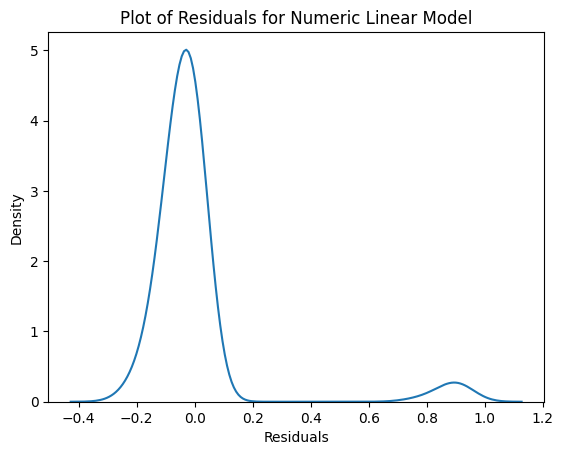

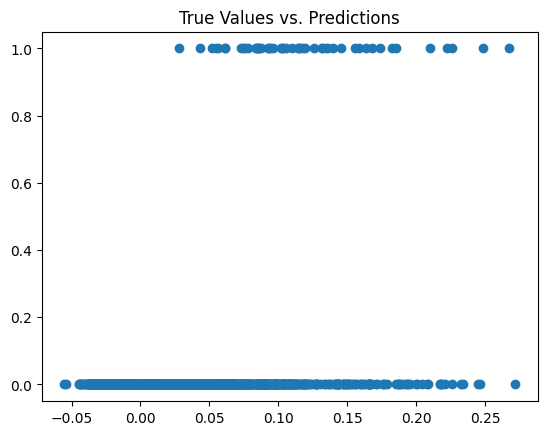

In [39]:
# Find Residuals
residuals = y_test - y_pred_num

# Residual Plot
sns.kdeplot(residuals)
plt.title('Plot of Residuals for Numeric Linear Model')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Predicted vs. Actual Values Plot
plt.scatter(x=y_pred_num,y=y_test)
plt.title('True Values vs. Predictions')
plt.show()

From the linear model provided in the Lab 2 writeup, our linear model, that regressed on numeric columns, had a higher RMSE value. We will keep trying to determine if we get a better model. 

### Linear Model - Categorical
Next, we will build another linear model where the target variable, "stroke", is regressed on the categorical variables alone. To do this, the categorical columns (for the training and testing data sets) need to be one-hot encoded. 

In [36]:
from sklearn.preprocessing import OneHotEncoder

# Second Model - make a model comprised of one-hot encoded regressors/features alone,
# and regress stroke on those variables

# Create the Encoder object
encoder = OneHotEncoder(sparse_output=False)

# One-hot encode the categorical variables in the training set
X_train_cat = encoder.fit_transform(X_train[categorical])
encoded_names = encoder.get_feature_names_out()
# Create a new, expanded dataframe
X_train_lm = pd.DataFrame(data=X_train_cat, columns = encoded_names) 

# One-hot encode the categorical variables in the testing set
X_test_cat = encoder.transform(X_test[categorical])
encoded_names = encoder.get_feature_names_out()
# Create a new, expanded dataframe
X_test_lm = pd.DataFrame(data=X_test_cat, columns = encoded_names) 

# Create and Fit the Model
model_cat = LinearRegression()
model_cat.fit(X_train_lm, y_train)

# Predict on the Test Set
y_pred_cat = model_cat.predict(X_test_lm)

# Calculate and Print
r2_cat = r2_score(y_test, y_pred_cat)
rmse_cat = mean_squared_error(y_test, y_pred_cat, squared=False)
print("The Categorical Linear Model R^2 is: ", r2_cat)
print("The Categorical Linear Model RMSE is: ", rmse_cat)

The Categorical Linear Model R^2 is:  0.02476171398571758
The Categorical Linear Model RMSE is:  0.21292230541805068


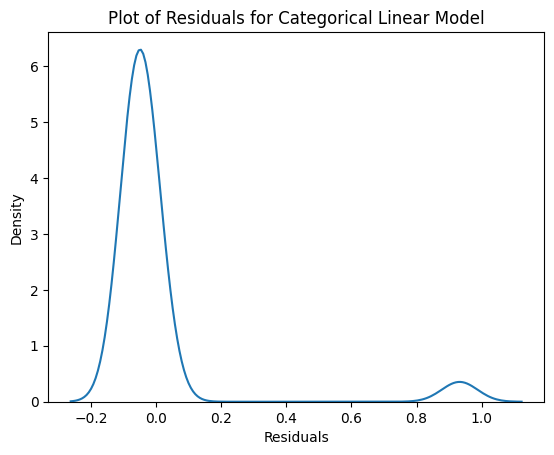

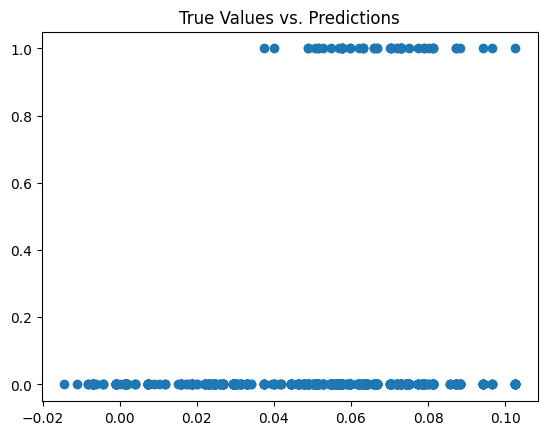

In [40]:
# Find Residuals
residuals = y_test - y_pred_cat

# Residual Plot
sns.kdeplot(residuals)
plt.title('Plot of Residuals for Categorical Linear Model')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Predicted vs. Actual Values Plot
plt.scatter(x=y_pred_cat,y=y_test)
plt.title('True Values vs. Predictions')
plt.show()

The categorical linear model did not perform signifcantly better than the numeric linear model. The RMSE value is still relatively low. 
We will try to build one more linear model, a combined model of numeric and categorical columns, and then we will try other models. Hopefully, having a combined model with all the numeric and categorical columns will perform better.

### Linear Model - Combined Model (Numeric and Categorical Columns)

### K nearest Neighbor (KNN)

### Decision Trees

### Analysis 
- Talk about research strategy
- Main findings (summarize tables/plots/statistics)

In [ ]:
# Comparison Table - model eval notes 
# gdf = pd.DataFrame({'SSE':[SSE_knn,SSE_lm,SSE_cart],
#                     'MSE':[MSE_knn,MSE_lm,MSE_cart],
#                     'RMSE':[RMSE_knn,RMSE_lm,RMSE_cart],
#                     'R2':[R2_knn,R2_lm,R2_cart]})
# gdf.index = ['kNN','LM','CART']
# gdf.head()